### This is a simple notebook to build and visualize the kNN algorithm applied to habitable planets.

Author: Viviana Acquaviva

License: [BSD-3-clause](https://opensource.org/license/bsd-3-clause/)

In [1]:
import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import pandas as pd 

import sklearn

from sklearn.model_selection import train_test_split # we don't use it here, but it's a useful function!

from sklearn import metrics # this will give us access to evaluation metrics

from sklearn import neighbors # here comes the method of the day

In [2]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

### Read in data from file

In [3]:
LearningSet = pd.read_csv('HPLearningSet.csv')

LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1) #We want to drop the first column of the file

In [4]:
#By now we know data frames

LearningSet.head(10) #Visualizes the first 5 rows

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


### Let's pick the same train/test set we had in the exercise

In [5]:
TrainSet =  LearningSet.iloc[:13,:] #.iloc is used to slice data frames using positional indexes

TestSet = LearningSet.iloc[13:,:]

### We split the train and test sets in features and label

In [6]:
Xtrain = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1)

Xtest = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1)

In [7]:
ytrain = TrainSet.P_HABITABLE

ytest = TestSet.P_HABITABLE

### We are now ready to deploy the kNN (k Nearest Neighbor) algorithm.

It's a simple algorithm based on the idea of distance: we look for the k (an integer) objects that are closest to the one we would like to classify, and take the majority vote among the k classes of the k neighbors.

If you are wondering: what is even there to fit?

I had the same question, and found some solace in [this post](https://stats.stackexchange.com/questions/349842/why-do-we-need-to-fit-a-k-nearest-neighbors-classifier).

In [18]:
model = neighbors.KNeighborsClassifier(n_neighbors = 3) #choose a number you like!

### For visualization purposes, let's use only the first two features to build the model.

In [19]:
Xtrain.iloc[:,:2] 

,S_MASS,P_PERIOD
0,0.86,3.601472
1,0.85,16.080661
2,1.19,7.638460
3,0.61,112.305300
4,0.98,12.992073
5,0.09,4.910000
6,0.69,4.655411
7,0.12,6.689000
8,1.12,1103.000000
9,0.81,168.811170


#### Build model by fitting training set (first two features only); predict labels for test set

In [20]:
model.fit(Xtrain.iloc[:,:2], ytrain)

ypred_test = model.predict(Xtest.iloc[:,:2])

#### Calculate accuracy on the train set and on the test set (train score and test score)

In [21]:
print(metrics.accuracy_score(ytrain, model.predict(Xtrain.iloc[:,:2])))

print(metrics.accuracy_score(ytest, model.predict(Xtest.iloc[:,:2])))


0.6923076923076923
0.8


#### After fitting and predicting, we can access the k neighbors for each element in the test set like this:

In [22]:
#the first element gives the distances, the second the index

#this bit of code visualizes the third nearest neighbor 

model.kneighbors(Xtest.iloc[:,:2]) 

(array([[ 0.26575741, 21.66422235, 39.72600482],
        [ 0.67412717,  2.76390862,  5.76653597],
        [ 7.28027781, 29.19416   , 47.25690512],
        [ 1.807928  ,  2.87670841,  3.5579225 ],
        [ 7.9223177 , 13.99261869, 32.05672308]]), array([[11, 10,  1],
        [ 4,  1,  2],
        [11, 10,  1],
        [ 2,  7,  4],
        [11, 10,  1]]))

### Let's now visualize our results, similarly to what we did for the DT.

We can use the largest distances as the radius of the circles - every point inside the circle is a neighbor!


In [ ]:
for i in range(len(TestSet)): # cycle through elements of the test set
    
    print(model.kneighbors(Xtest.iloc[:,:2])[0][i,2]) # this prints out the third element of the distances vector

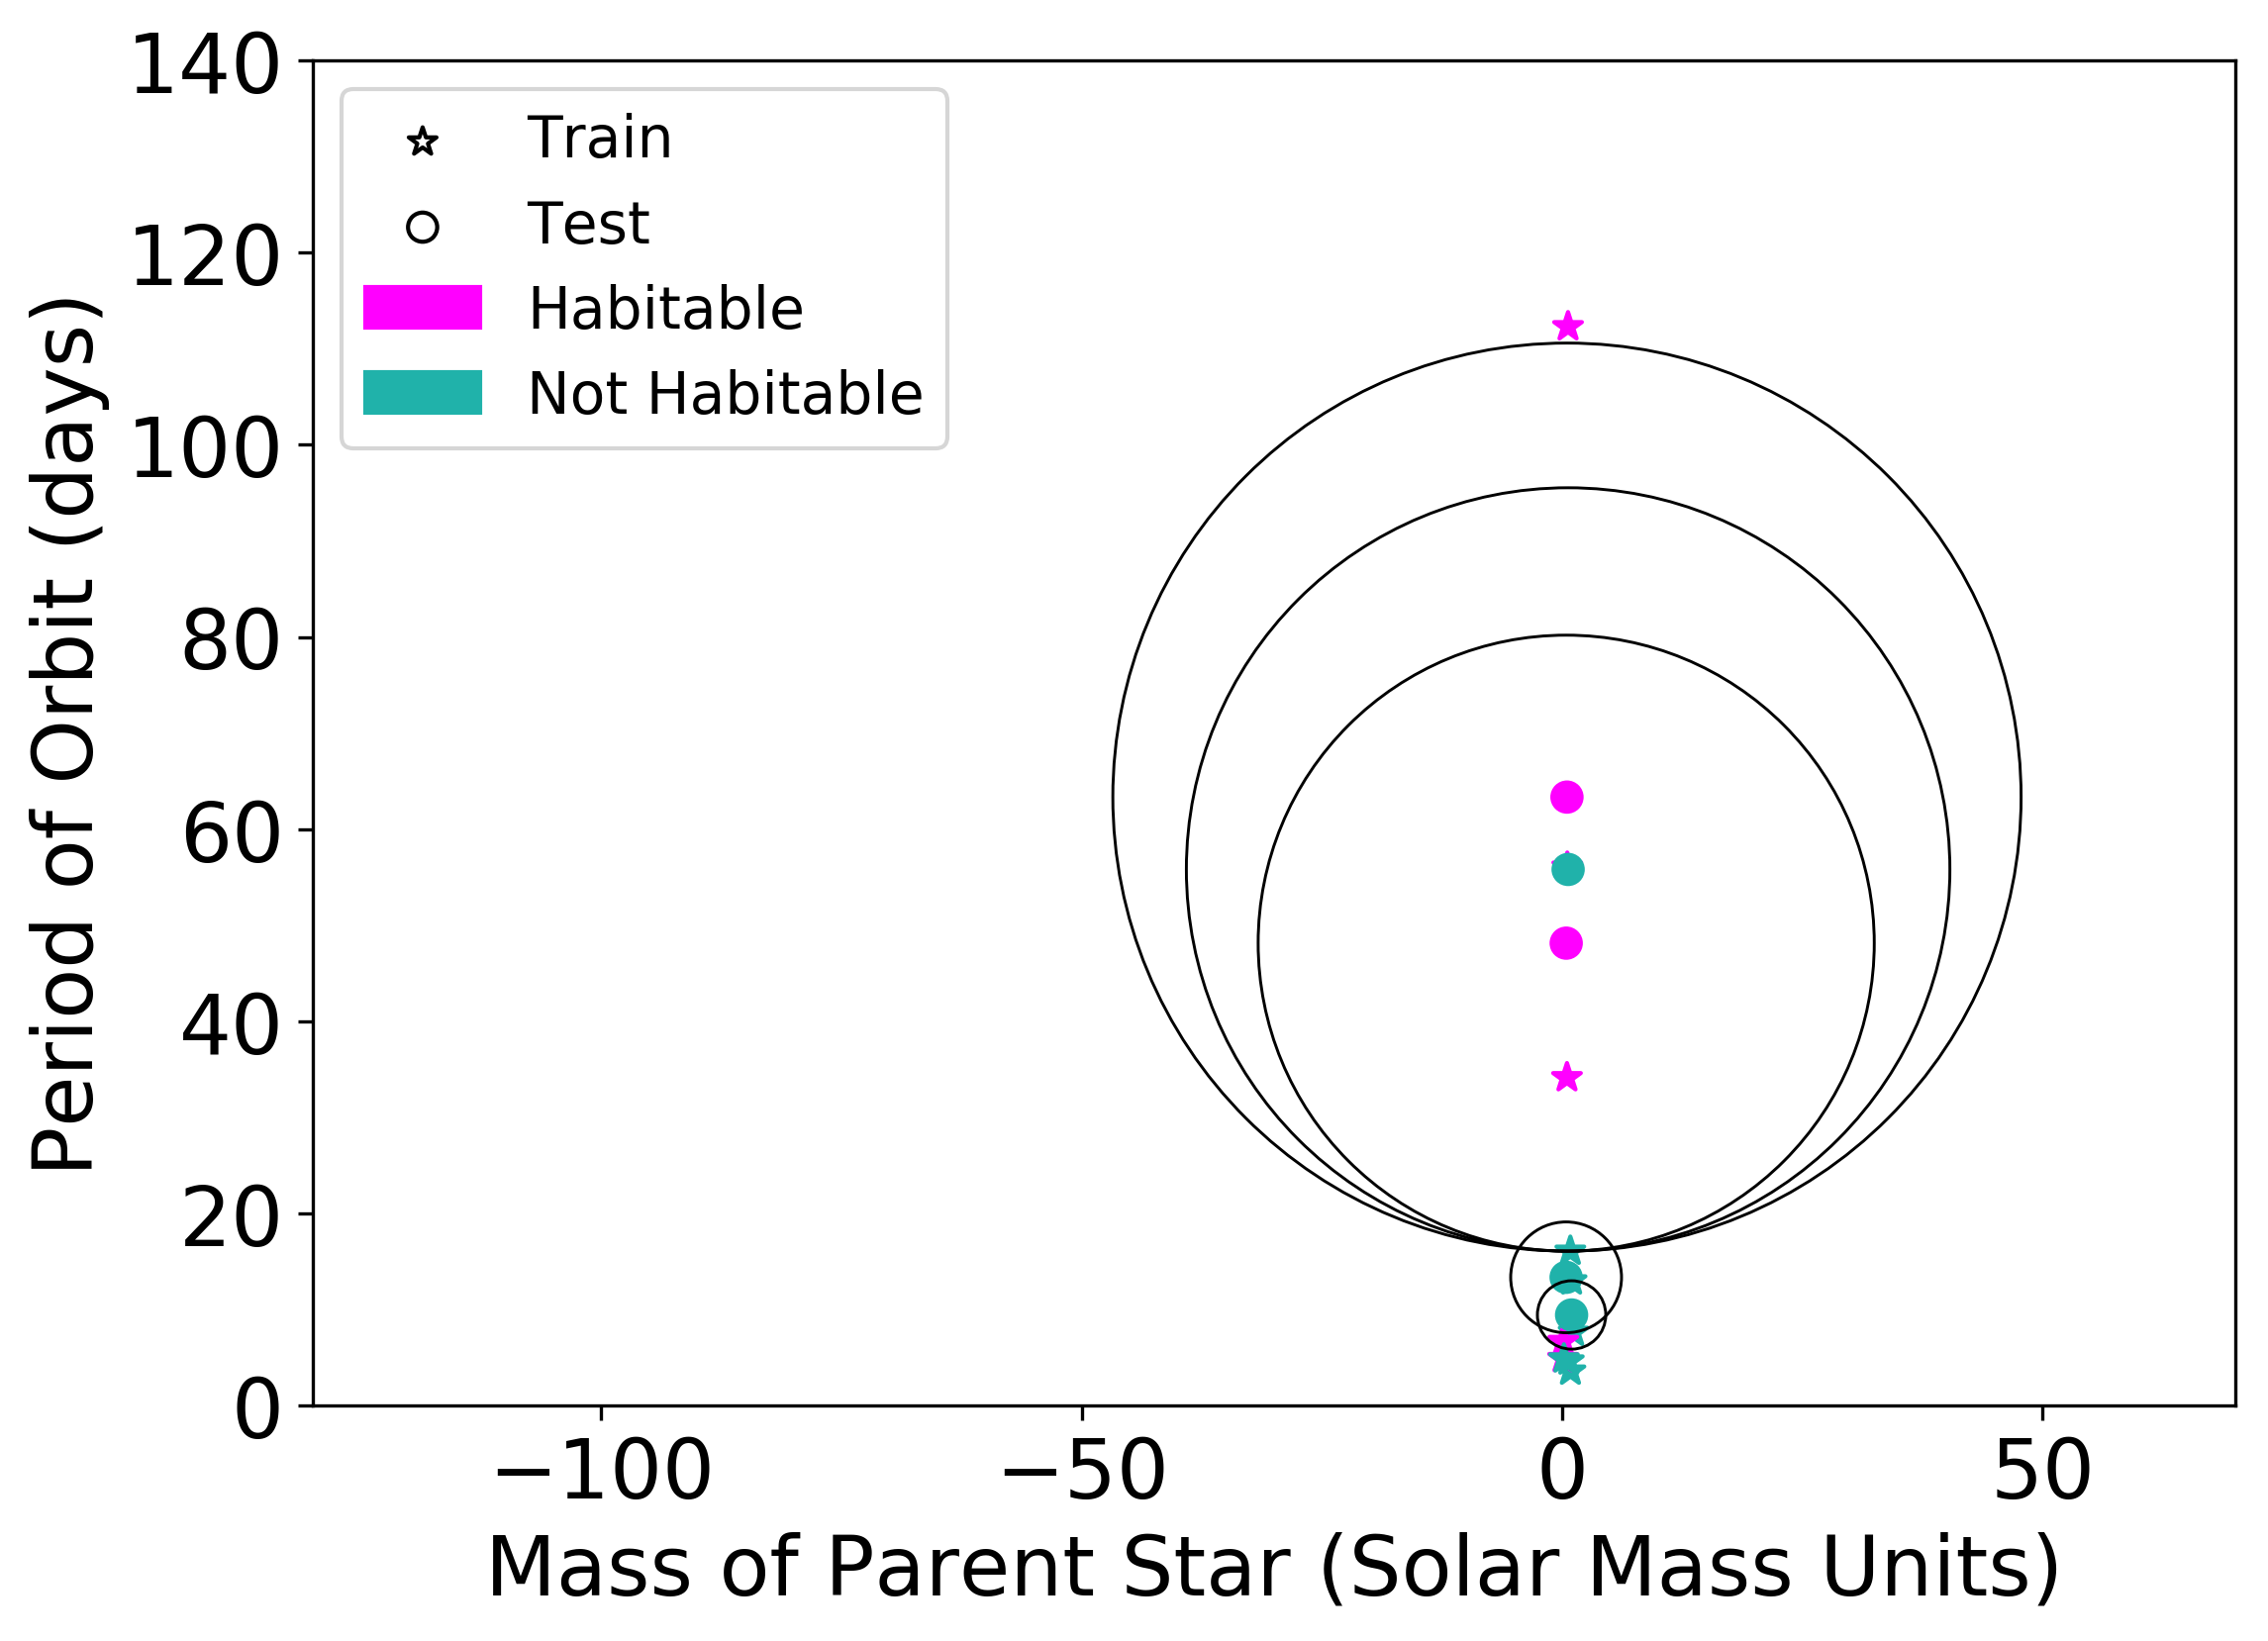

In [25]:
plt.figure(figsize=(10,6))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
a = plt.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker = '*',facecolors = 'none',\
            c = TrainSet['P_HABITABLE'], s = 50, label = 'Train', cmap=cmap) 

#a.set_facecolor('none')

a = plt.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker = 'o',facecolors = 'none',\
            c = TestSet['P_HABITABLE'], s = 50, label = 'Test', cmap=cmap) 

#a.set_facecolor('none')

for i in range(len(TestSet)): #plot neighbors

    circle1=plt.Circle((TestSet['S_MASS'].iloc[i],TestSet['P_PERIOD'].iloc[i]),model.kneighbors(Xtest.iloc[:,:2])[0][i,2],\
                       lw = 0.7, edgecolor='k',facecolor='none')
    plt.gca().add_artist(circle1)
    
plt.gca().set_aspect(1)

bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')
magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
leg.legendHandles[0].set_facecolor('none')
leg.legendHandles[1].set_color('k')
leg.legendHandles[1].set_facecolor('none')


plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
           loc = 'upper left', fontsize = 14)

plt.xlim(-130,70)
plt.ylim(0,140)
plt.xlabel('Mass of Parent Star (Solar Mass Units)')
plt.ylabel('Period of Orbit (days)');

#plt.savefig('HabPlanetsKNN2features.png', dpi = 300)

### Do you notice any issue here?

The orbital period is dominating the estimate of distance :( 











The issue of different weights for different dimensions can be solved by <b>scaling</b>. Scaling is a very important pre-processing step for most ML algorithms.

See some examples of different scaling algorithms [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

We will go with Robust Scaler. 


In [26]:
scaler = sklearn.preprocessing.RobustScaler()

In [27]:
#Derive the transformation that bring each feature to roughly same range 

scaler.fit(Xtrain) # important: we only scale the train set

RobustScaler()

In [28]:
scaledXTrain = scaler.transform(Xtrain)

In [29]:
scaledXtest = scaler.transform(Xtest) # note that these are now numpy arrays, not data frames

In [30]:
model.fit(scaledXTrain[:,:2],ytrain).predict(scaledXtest[:,:2]) #you can chain these

array([1, 0, 1, 0, 1])

In [31]:
model.kneighbors(scaledXtest[:,:2]) #The distances of neighbors for test set objects 

#the first part are the distances to the three closest neighbors;
#the second part contains the indices of the three closest neighbors.

(array([[0.2500478 , 0.53900086, 1.00570768],
        [0.47721081, 0.66005572, 0.79614695],
        [0.16494121, 0.57079985, 1.00501058],
        [0.06956397, 0.35230123, 0.38378203],
        [0.34256727, 0.35245873, 1.07701084]]), array([[11, 10,  1],
        [10, 12,  6],
        [11, 10,  3],
        [ 4,  0,  1],
        [11, 10, 12]]))

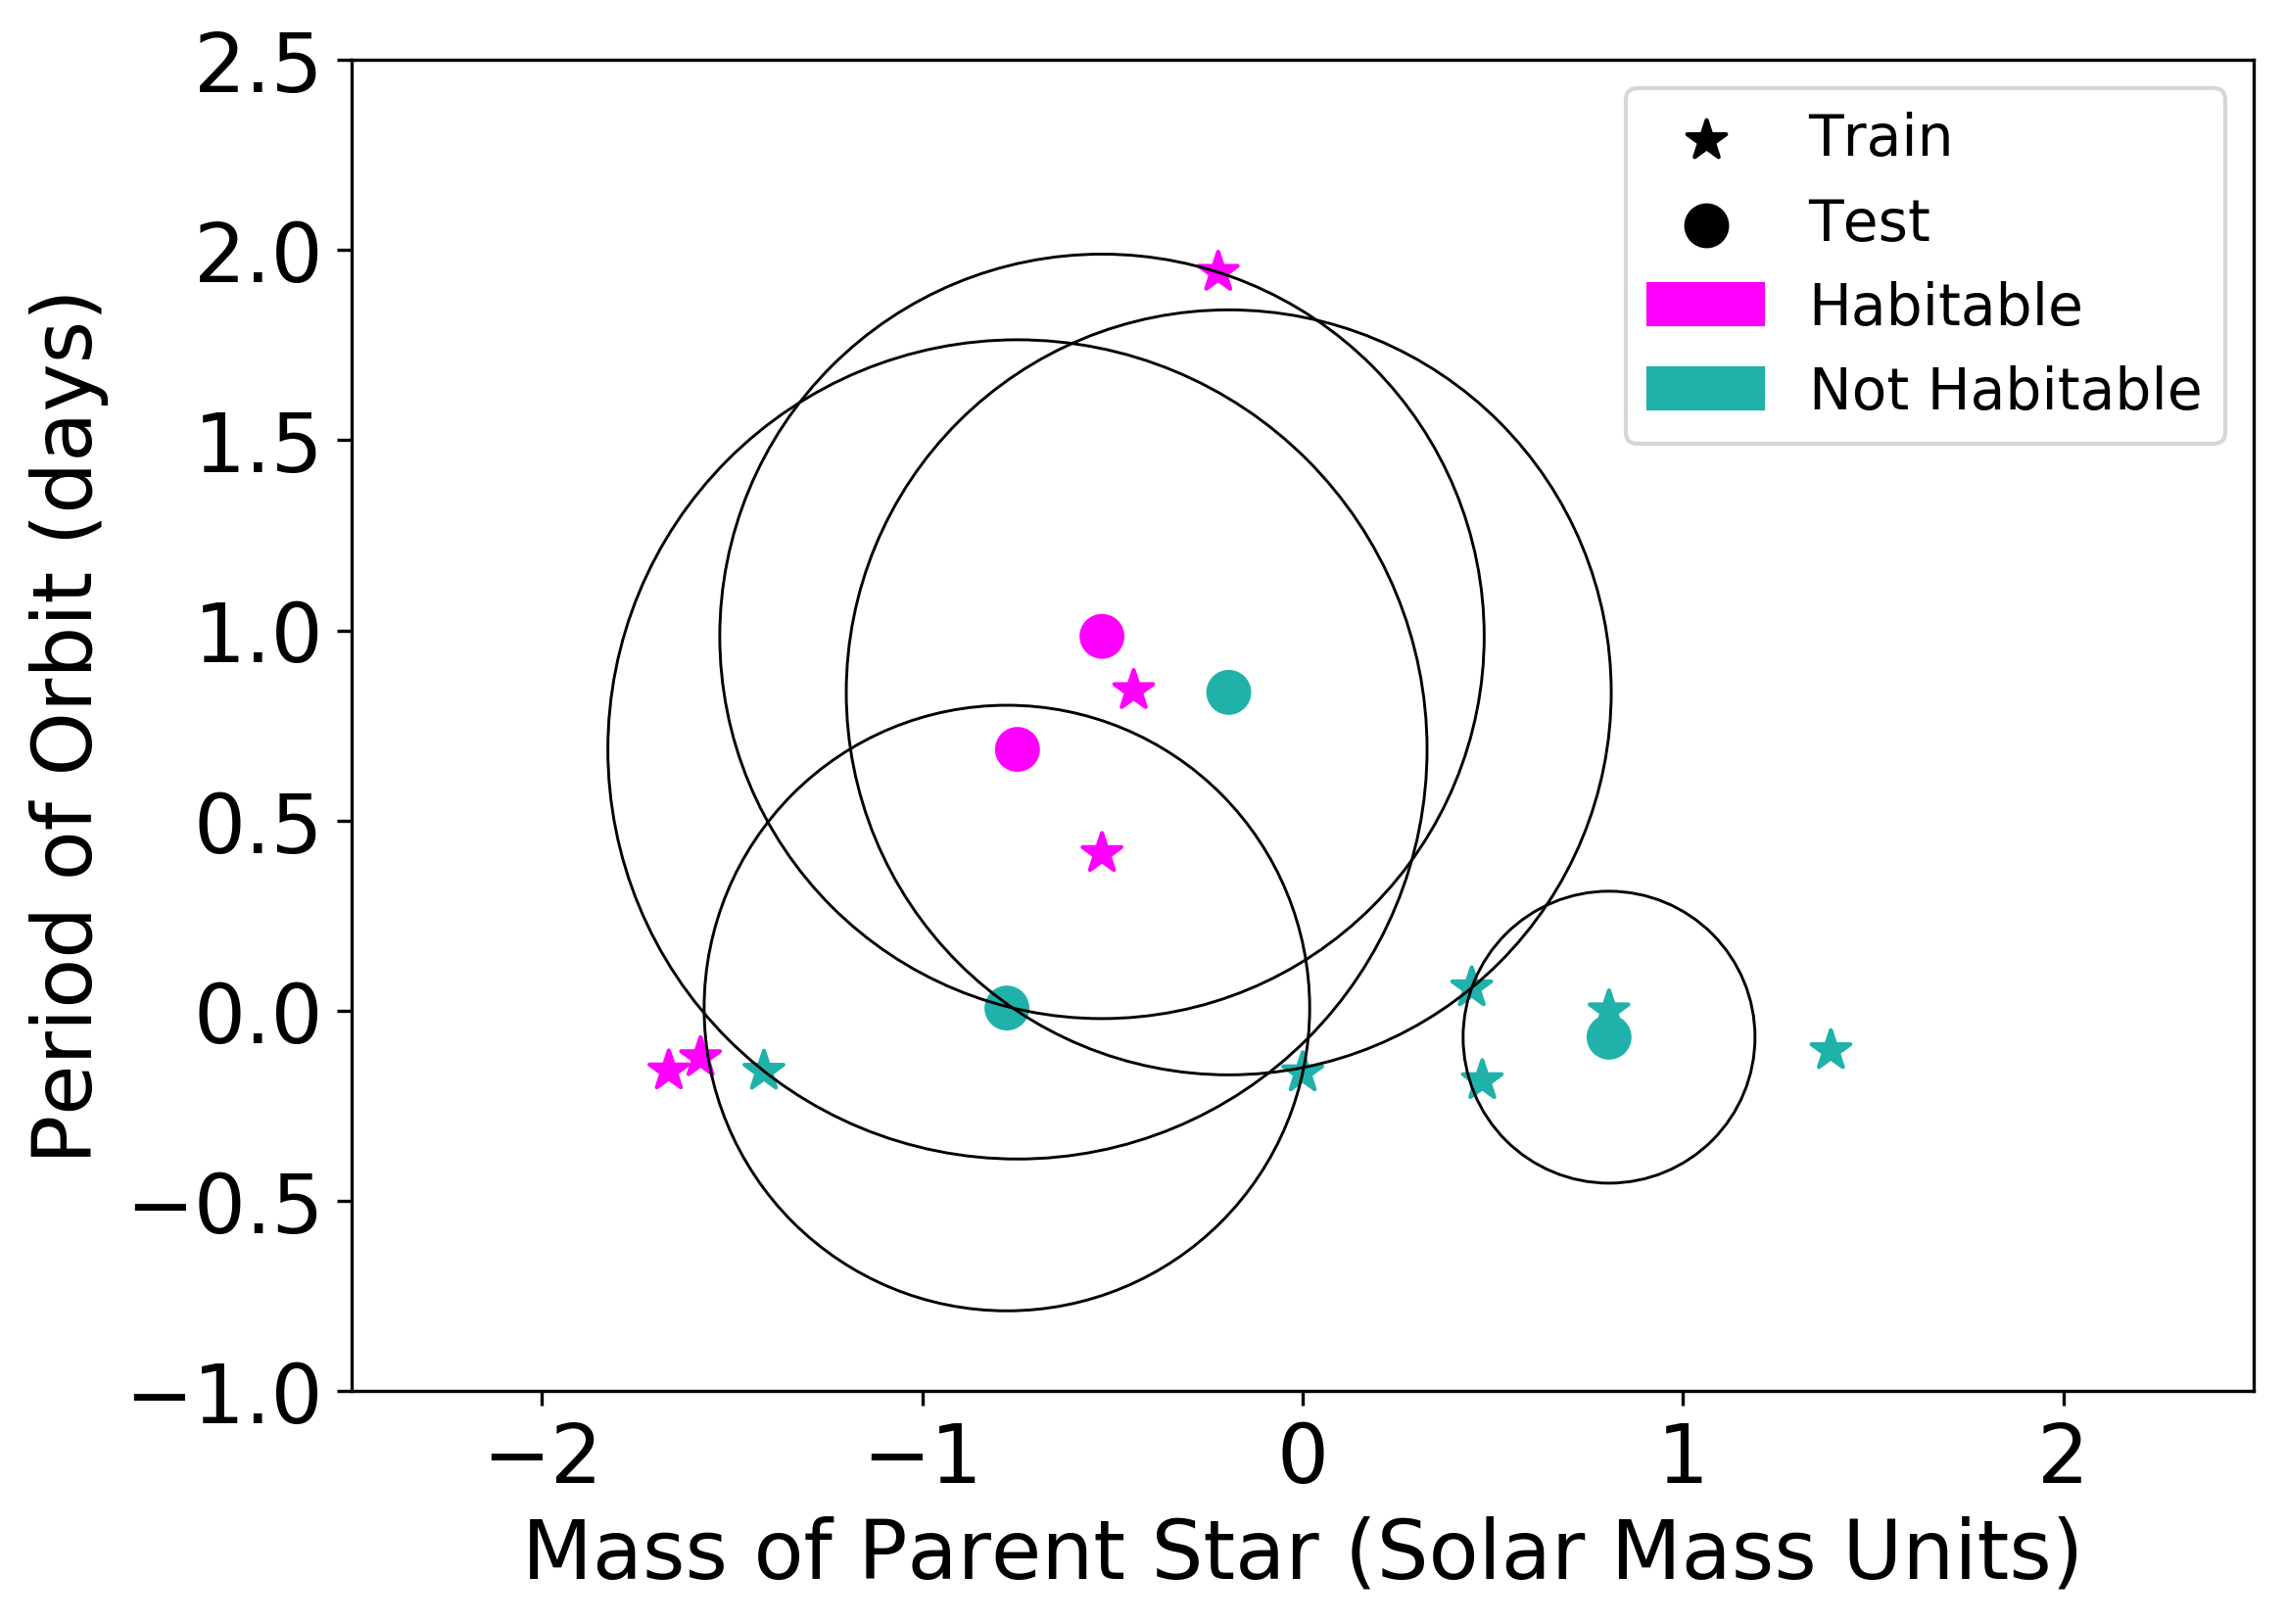

In [32]:
plt.figure(figsize=(10,6))#, aspect_ratio = 'equal')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
plt.scatter(scaledXTrain[:,0], scaledXTrain[:,1], marker = '*',\
            c = ytrain, s = 100, label = 'Train', cmap=cmap) #, 

plt.scatter(scaledXtest[:,0], scaledXtest[:,1], marker = 'o',\
            c = ytest, s = 100, label = 'Test', cmap=cmap) #label = ,

for i in range(len(TestSet)):

    circle1=plt.Circle((scaledXtest[i,0],scaledXtest[i,1]),model.kneighbors(scaledXtest[:,:2])[0][i,2],\
                       edgecolor='k',facecolor='none', lw = 0.7)
    plt.gca().add_artist(circle1)

plt.gca().set_aspect(1)

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
#leg.legendHandles[0].set_facecolor('none')
leg.legendHandles[1].set_color('k')
#leg.legendHandles[1].set_facecolor('none')


plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
           loc = 'upper right', fontsize = 14)

plt.xlabel('Mass of Parent Star (Solar Mass Units)')
plt.ylabel('Period of Orbit (days)');


plt.xlim(-2.5,2.5)
plt.ylim(-1.,2.5);

#plt.savefig('HabPlanetsKNNscaled.png', dpi = 300)

### Note: for the purpose of application (not visualization), we should use all three features.

### Now let's calculate the accuracy scores on the training and test set.

In [37]:
metrics.accuracy_score(ytrain, model.predict(scaledXTrain[:,:2]))

0.8461538461538461

In [38]:
metrics.accuracy_score(ytest, model.predict(scaledXtest[:,:2]))

0.8

### Final remarks:
    
kNN needs scaling! Does DT have the same issue?

No, because we only use one feature at a time.


Any thoughts on strengths/weaknesses?

Easy to interpret, fast

Will count every feature in the distance calculation (sensitive to noisy ones!)
